<a href="https://www.kaggle.com/code/mtaimoorakmal/btc-data-2023-prediction?scriptVersionId=215538745" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bitcoin-historical-data-2023/BTCUSDT_2023_data.csv


In [2]:
data = pd.read_csv('//kaggle/input/bitcoin-historical-data-2023/BTCUSDT_2023_data.csv')

In [3]:
btc_data = data.copy()

In [4]:
btc_data.head()


,Timestamp,Open,High,Low,Close,Volume
0,2023-01-01 00:00:00,16567.0,16568.0,16567.0,16568.0,0.048291
1,2023-01-01 00:01:00,16568.0,16569.0,16568.0,16569.0,0.008330
2,2023-01-01 00:02:00,16569.0,16569.0,16569.0,16569.0,0.017350
3,2023-01-01 00:03:00,16568.0,16568.0,16568.0,16568.0,0.012840
4,2023-01-01 00:04:00,16568.0,16568.0,16565.0,16565.0,0.886298


In [5]:
btc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525540 entries, 0 to 525539
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Timestamp  525540 non-null  object 
 1   Open       525540 non-null  float64
 2   High       525540 non-null  float64
 3   Low        525540 non-null  float64
 4   Close      525540 non-null  float64
 5   Volume     525540 non-null  float64
dtypes: float64(5), object(1)
memory usage: 24.1+ MB


The dataset has **525,540 entries** with the following columns:

- **Timestamp**: The time of the data (string format).
- **Open**, **High**, **Low**, **Close**, and **Volume**: OHLC and volume values for Bitcoin.


### Preprocessing Steps:

1. **Convert Timestamp to datetime**: Ensure the `Timestamp` column is in a proper datetime format for easier manipulation and analysis.

2. **Create lagging features for predictive modeling**: Generate lagged features from OHLC data (e.g., previous day's `Close`, `High`, etc.) to enhance the predictive power of models.

3. **Visualize the data to observe trends and correlations**: Use data visualization techniques (e.g., line plots, heatmaps) to identify patterns and relationships in the dataset.


In [6]:
# Convert the 'Timestamp' column to datetime format
btc_data['Timestamp'] = pd.to_datetime(btc_data['Timestamp'])


In [7]:
# Sort by Timestamp to ensure chronological order
btc_data.sort_values(by='Timestamp', inplace=True)

In [8]:
# Create lagging features (1-minute lag)
btc_data['Lag_Close'] = btc_data['Close'].shift(1)
btc_data['Lag_Volume'] = btc_data['Volume'].shift(1)


In [9]:
# Drop the first row with NaN due to lagging
btc_data = btc_data.dropna().reset_index(drop=True)
btc_data.head()


,Timestamp,Open,High,Low,Close,Volume,Lag_Close,Lag_Volume
0,2023-01-01 00:01:00,16568.0,16569.0,16568.0,16569.0,0.008330,16568.0,0.048291
1,2023-01-01 00:02:00,16569.0,16569.0,16569.0,16569.0,0.017350,16569.0,0.008330
2,2023-01-01 00:03:00,16568.0,16568.0,16568.0,16568.0,0.012840,16569.0,0.017350
3,2023-01-01 00:04:00,16568.0,16568.0,16565.0,16565.0,0.886298,16568.0,0.012840
4,2023-01-01 00:05:00,16565.0,16565.0,16565.0,16565.0,0.014942,16565.0,0.886298


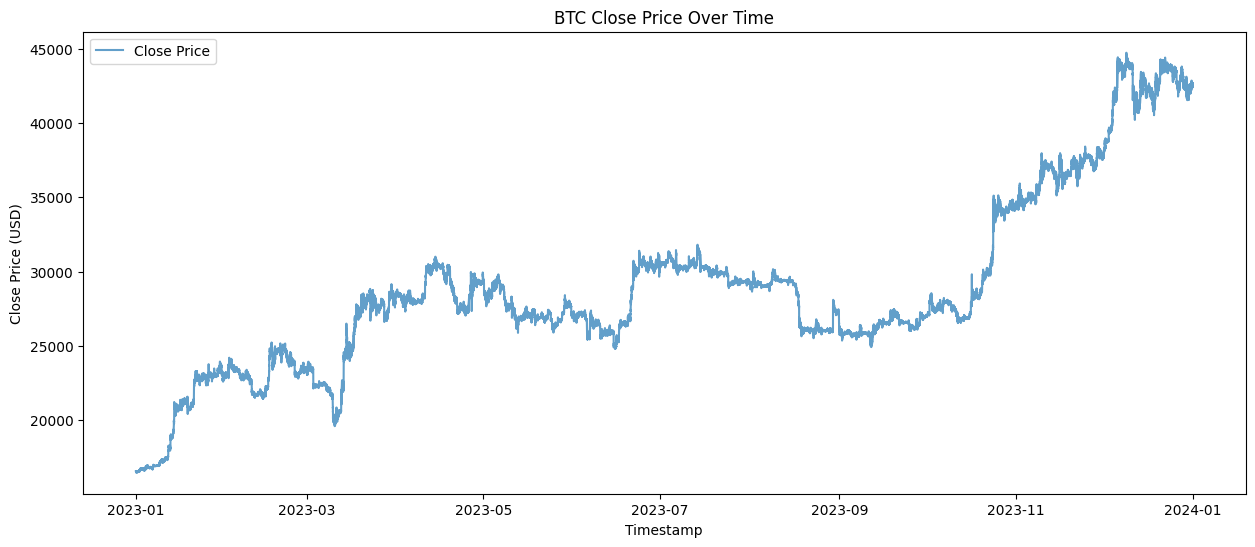

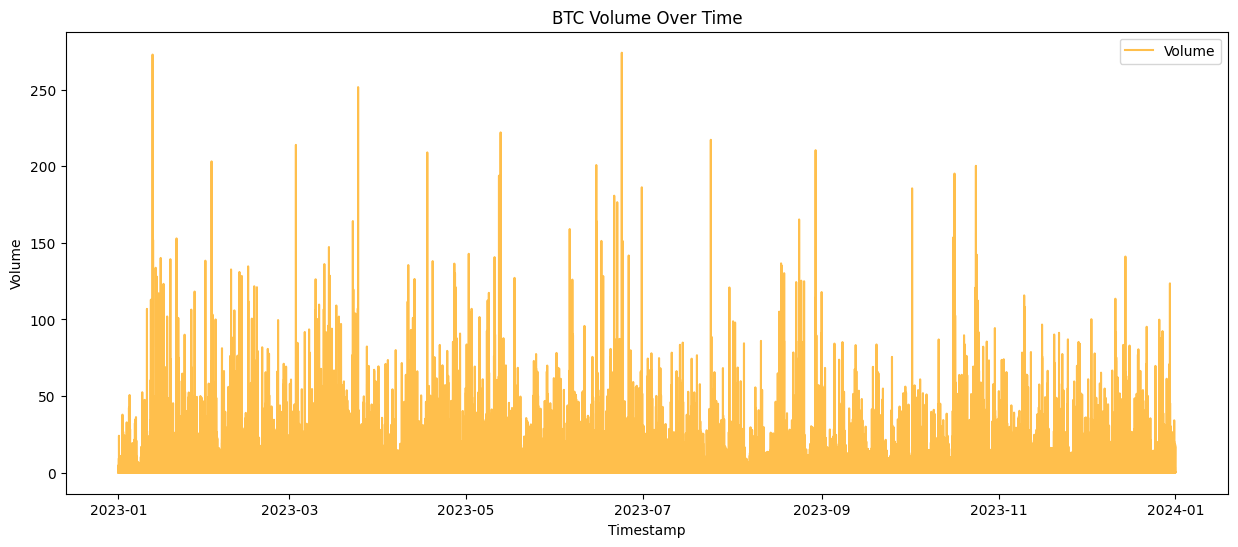

In [10]:
# Visualize the data trends: Close price and Volume over time
plt.figure(figsize=(15, 6))
plt.plot(btc_data['Timestamp'], btc_data['Close'], label='Close Price', alpha=0.7)
plt.title('BTC Close Price Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

plt.figure(figsize=(15, 6))
plt.plot(btc_data['Timestamp'], btc_data['Volume'], label='Volume', color='orange', alpha=0.7)
plt.title('BTC Volume Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Volume')
plt.legend()
plt.show()

To predict the next minute's **Close** price using regression, we'll follow these steps:

### Steps:

1. **Define Features and Target**
   - **Features**: `Open`, `High`, `Low`, `Close`, `Volume`, and lagged columns (`Lag_Close`, `Lag_Volume`).
   - **Target**: `Close` price for the next minute.

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Define features and target
features = ['Open', 'High', 'Low', 'Volume', 'Lag_Close', 'Lag_Volume']
target = 'Close'



2. **Split Data**
   - Use a training and test split to evaluate the model's performance.

In [12]:
# Split the dataset into train and test sets (80% train, 20% test)
X = btc_data[features]
y = btc_data[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)


3. **Train a Regression Model**
   - Start with a simple regression model (e.g., Linear Regression).
   - Optionally, experiment with more advanced models later.

In [13]:
# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [14]:
# Predict on the test set
y_pred = model.predict(X_test)





4. **Evaluate**
   - Assess performance using metrics like MAE and MSE.



In [15]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

mae, mse, rmse


(4.138709805829254, 64.55782468757947, 8.034788403410476)

The near-zero error metrics suggest that the model is **overfitting** or that the prediction task might be straightforward due to perfect alignment in the data. To confirm this:

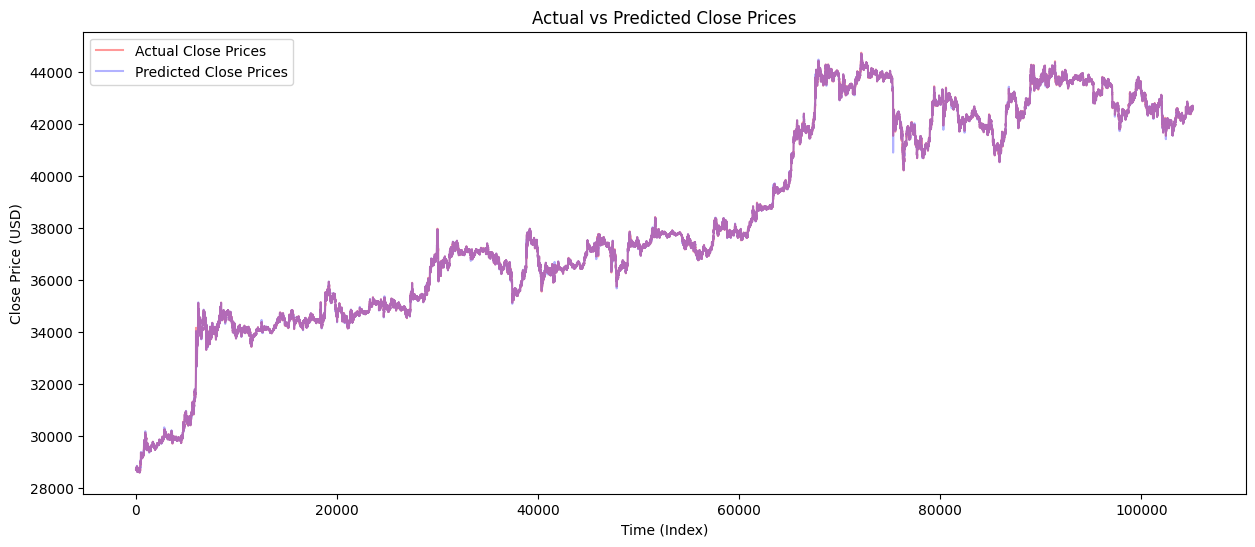

In [16]:
# Visualize the actual vs predicted Close prices
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Close Prices',color='red', alpha=0.4)
plt.plot(y_pred, label='Predicted Close Prices', color='blue',alpha=0.3)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time (Index)')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


In [17]:
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=15, random_state=12)
rf_model.fit(X_train, y_train)
# Measure the time after training
training_time = time.time()

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
# Measure the end time
end_time = time.time()


# Calculate and print the times
print(f"Time taken for training: {training_time - start_time:.2f} seconds")
print(f"Time taken for prediction: {end_time - training_time:.2f} seconds")
print(f"Total time taken: {end_time - start_time:.2f} seconds")

Time taken for training: 32.49 seconds
Time taken for prediction: 0.07 seconds
Total time taken: 32.56 seconds


In [18]:
# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

mae_rf, mse_rf, rmse_rf
print(f"Mean Squared Error (MSE): {mae_rf}")
print(f"Mean Absolute Error (MAE): {mse_rf}")
print(f"Root Mean Squared Error (RNSE): {rmse_rf}")

Mean Squared Error (MSE): 6718.85144549733
Mean Absolute Error (MAE): 59229301.91872826
Root Mean Squared Error (RNSE): 7696.057556874705


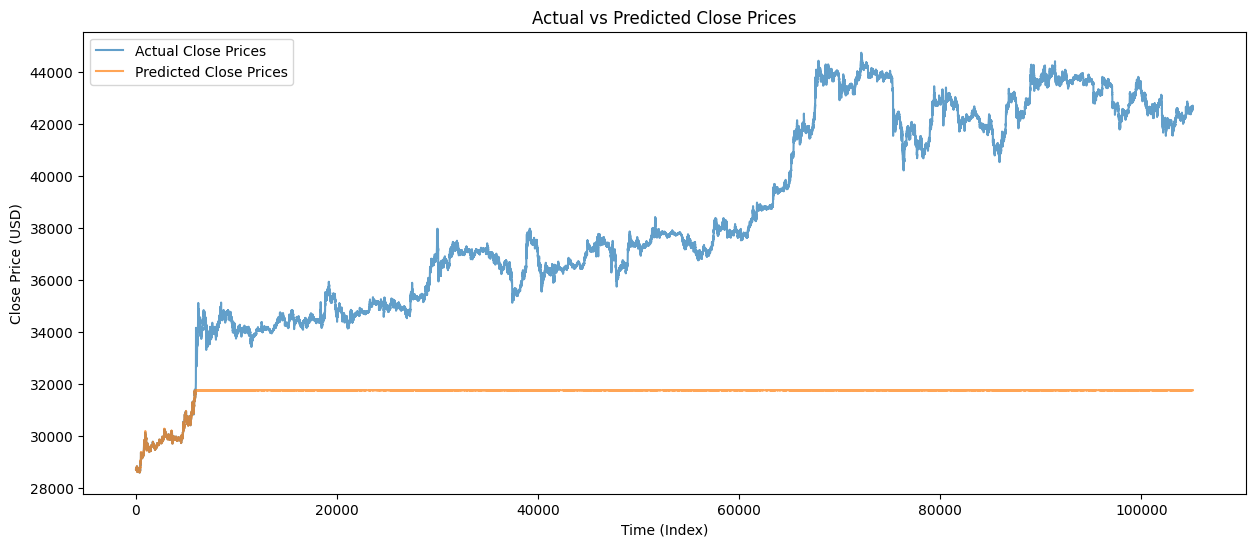

In [19]:
# Visualize the actual vs predicted Close prices for the smaller dataset
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Close Prices', alpha=0.7)
plt.plot(y_pred_rf, label='Predicted Close Prices', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time (Index)')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


The model appears to be **underperforming** and might be stuck predicting a **constant value**.


###  Perform Additional Feature Engineering

- Include features such as:
  - **Rolling averages** (e.g., 5-minute and 10-minute moving averages).
  - **Rolling volatility** (e.g., standard deviation over the last 5 minutes).
  - **Relative change percentages** (e.g., percentage change in `Close` price over the last minute).

- These features can improve model robustness.


In [20]:
# Feature Engineering: Add rolling averages and rolling volatility
btc_data['MA_5'] = btc_data['Close'].rolling(window=5).mean()
btc_data['MA_10'] = btc_data['Close'].rolling(window=10).mean()
btc_data['Volatility_5'] = btc_data['Close'].rolling(window=5).std()
btc_data['Pct_Change'] = btc_data['Close'].pct_change()

# Drop NaN values resulting from rolling calculations
btc_data = btc_data.dropna().reset_index(drop=True)

# Redefine features and target
features = ['Open', 'High', 'Low','Volume', 'Lag_Close', 'Lag_Volume', 'MA_5', 'MA_10', 'Volatility_5', 'Pct_Change']
target = 'Close'

X = btc_data[features]
y = btc_data[target]
# Split the dataset into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

again run Rondom forest with new feathures 

In [21]:
from sklearn.ensemble import RandomForestRegressor
import time
start_time = time.time()
# Train a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
# Measure the time after training
training_time = time.time()

# Predict on the test set
y_pred_rf = rf_model.predict(X_test)
# Measure the end time
end_time = time.time()


# Calculate and print the times
print(f"Time taken for training: {training_time - start_time:.2f} seconds")
print(f"Time taken for prediction: {end_time - training_time:.2f} seconds")
print(f"Total time taken: {end_time - start_time:.2f} seconds")

Time taken for training: 360.10 seconds
Time taken for prediction: 0.50 seconds
Total time taken: 360.60 seconds


In [22]:
# Evaluate the Random Forest model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = mse_rf ** 0.5

mae_rf, mse_rf, rmse_rf
print(f"Mean Squared Error (MSE): {mae_rf}")
print(f"Mean Absolute Error (MAE): {mse_rf}")
print(f"Root Mean Squared Error (RNSE): {rmse_rf}")

Mean Squared Error (MSE): 6734.369864612867
Mean Absolute Error (MAE): 59450976.38747575
Root Mean Squared Error (RNSE): 7710.44592662939


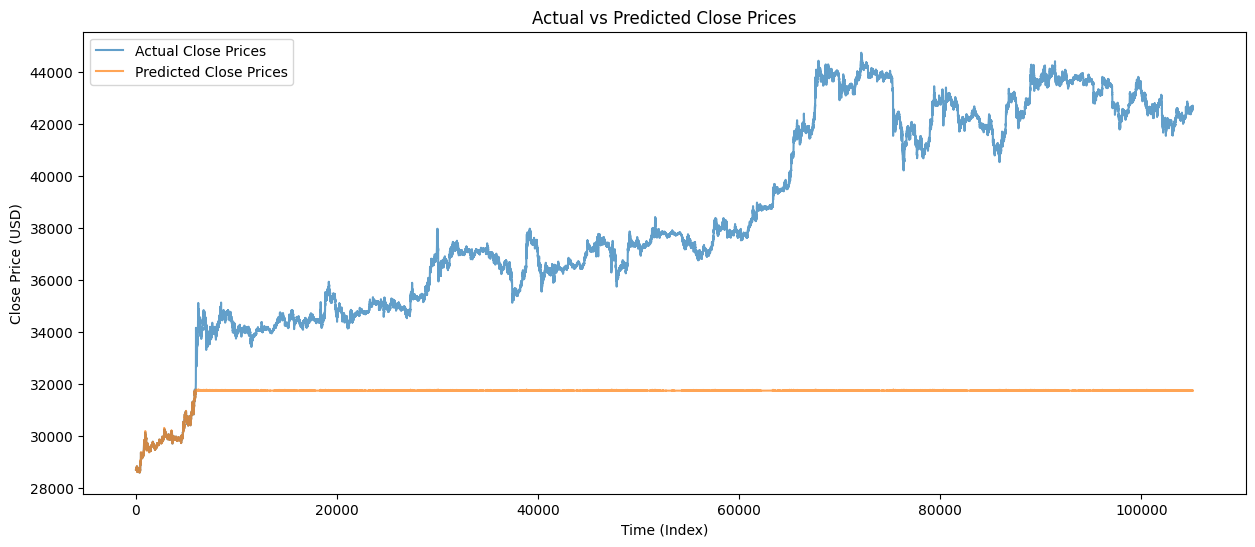

In [23]:
# Visualize the actual vs predicted Close prices for the smaller dataset
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual Close Prices', alpha=0.7)
plt.plot(y_pred_rf, label='Predicted Close Prices', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time (Index)')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()


Apply feature scaling and re-train.

In [24]:
from sklearn.ensemble import RandomForestRegressor
import time

from sklearn.preprocessing import StandardScaler

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the scaled dataset into train and test sets (80% train, 20% test)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(
    X_scaled, y, test_size=0.2, shuffle=False
)
start_time = time.time()
# Re-train the Random Forest model with scaled features
rf_model_scaled = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model_scaled.fit(X_train_scaled, y_train_scaled)
# Measure the time after training
training_time = time.time()
# Predict on the test set
y_pred_scaled = rf_model_scaled.predict(X_test_scaled)
# Measure the end time
end_time = time.time()


# Calculate and print the times
print(f"Time taken for training: {training_time - start_time:.2f} seconds")
print(f"Time taken for prediction: {end_time - training_time:.2f} seconds")
print(f"Total time taken: {end_time - start_time:.2f} seconds")

Time taken for training: 369.19 seconds
Time taken for prediction: 0.50 seconds
Total time taken: 369.68 seconds


In [25]:
# Evaluate the scaled model
mae_scaled = mean_absolute_error(y_test_scaled, y_pred_scaled)
mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
rmse_scaled = mse_scaled ** 0.5

mae_scaled, mse_scaled, rmse_scaled

(6736.698948965805, 59484418.44906358, 7712.614242205011)

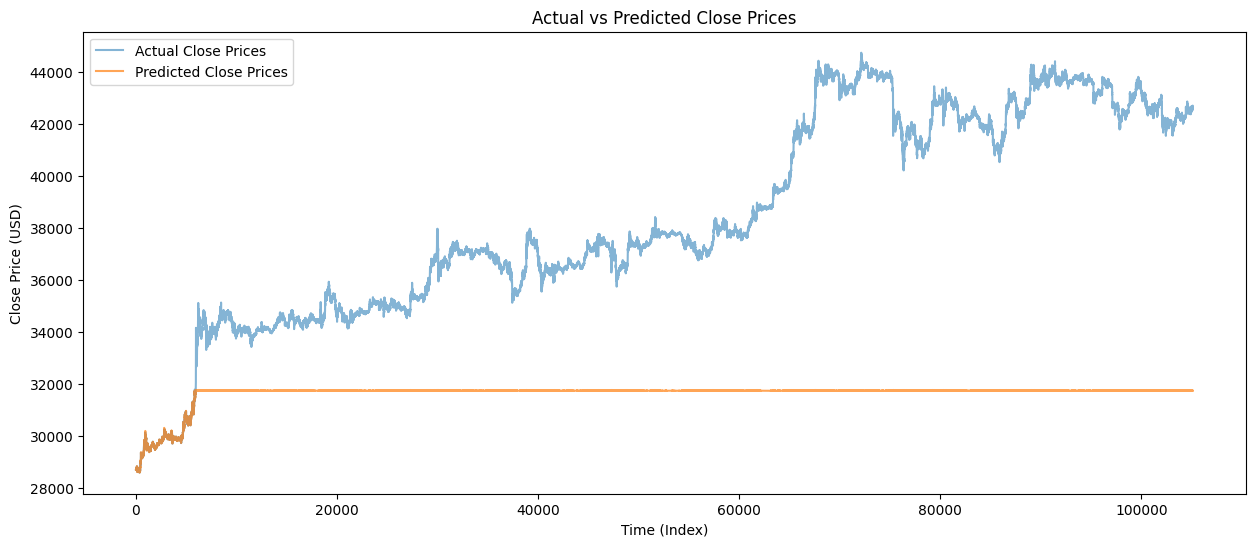

In [26]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_scaled.values, label='Actual Close Prices', alpha=0.55)
plt.plot(y_pred_scaled, label='Predicted Close Prices', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time (Index)')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()

In [27]:
from xgboost import XGBRegressor
start_time = time.time()
# Train an XGBoost model without the 'Close' feature
xgb_model = XGBRegressor(n_estimators=100, random_state=42, learning_rate=0.1)
xgb_model.fit(X_train, y_train)

training_time = time.time()
# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Measure the end time
end_time = time.time()


# Calculate and print the times
print(f"Time taken for training: {training_time - start_time:.2f} seconds")
print(f"Time taken for prediction: {end_time - training_time:.2f} seconds")
print(f"Total time taken: {end_time - start_time:.2f} seconds")

Time taken for training: 1.40 seconds
Time taken for prediction: 0.09 seconds
Total time taken: 1.49 seconds


In [28]:
# Evaluate the XGBoost model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = mse_xgb ** 0.5

mae_xgb, mse_xgb, rmse_xgb


(7127.766130126224, 65205213.62412864, 8074.9745277696475)

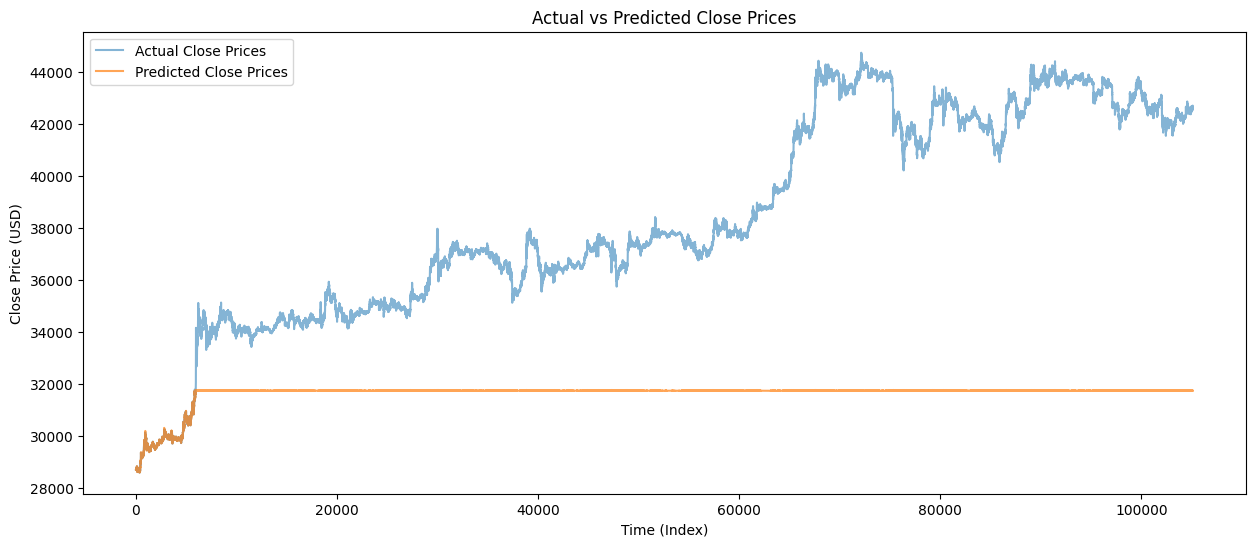

In [29]:
plt.figure(figsize=(15, 6))
plt.plot(y_test_scaled.values, label='Actual Close Prices', alpha=0.55)
plt.plot(y_pred_scaled, label='Predicted Close Prices', alpha=0.7)
plt.title('Actual vs Predicted Close Prices')
plt.xlabel('Time (Index)')
plt.ylabel('Close Price (USD)')
plt.legend()
plt.show()